# Introduction to Python and Jupyter Notebooks Review

To begin, be sure you understand how to move between cells in a Jupyter notebook and change them from code to markdown.  If you want additional work with styling markdown cells, please see the [cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).  In this part of the notebook, we will review some numpy basics and create some simple plots with Matplotlib.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### NumPy and Matplotlib

To begin, let's play with some basic `matplotlib` plots and the NumPy random methods. For more information please consult the documentation [here](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html). 

In [2]:
a = np.random.randint(1, 20, 1000)

(array([114., 115.,  92., 124.,  55., 105., 104.,  96., 107.,  88.]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <a list of 10 Patch objects>)

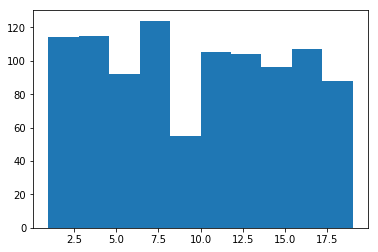

In [3]:
plt.figure()
plt.hist(a)

In [4]:
b = np.random.random(1000)
c = np.random.normal(5, 10, 1000)
d = np.random.binomial(100, .3, 1000)

(array([104., 101.,  85., 109.,  96., 103., 106., 115.,  98.,  83.]),
 array([0.00147129, 0.10130582, 0.20114036, 0.3009749 , 0.40080943,
        0.50064397, 0.60047851, 0.70031304, 0.80014758, 0.89998212,
        0.99981665]),
 <a list of 10 Patch objects>)

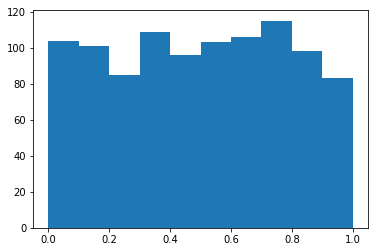

In [5]:
plt.hist(b)

In [ ]:
#np.random.binomial?

In [6]:
a[:5]

array([16, 10,  2,  8,  1])

Text(0.5,1,'Binomial Distribution')

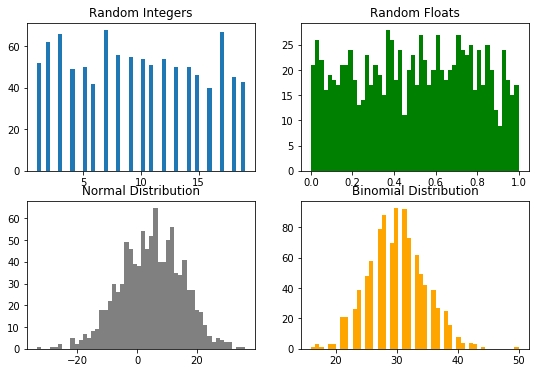

In [7]:
plt.figure(figsize = (9, 6))

plt.subplot(2, 2, 1)
plt.hist(a, bins = 50)
plt.title("Random Integers")

plt.subplot(2, 2, 2)
plt.hist(b, bins = 50, color = 'green')
plt.title("Random Floats")

plt.subplot(2, 2, 3)
plt.hist(c, bins = 50, color = 'grey')
plt.title("Normal Distribution")

plt.subplot(2, 2, 4)
plt.hist(d,bins = 50, color = 'orange')
plt.title("Binomial Distribution")

<IPython.core.display.Javascript object>


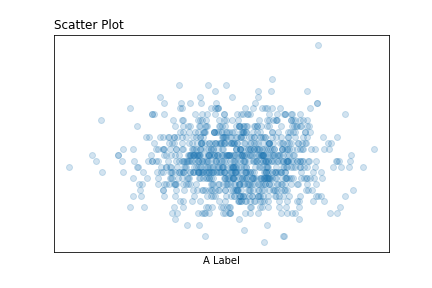

([], <a list of 0 Text yticklabel objects>)

In [11]:
%matplotlib notebook
plt.figure()
plt.scatter(c, d, alpha = 0.2)
plt.title("Scatter Plot", loc = 'left')
plt.xticks([])
plt.yticks([])

In [12]:
plt.xlabel('A Label')

Text(0.5,32,'A Label')

<IPython.core.display.Javascript object>


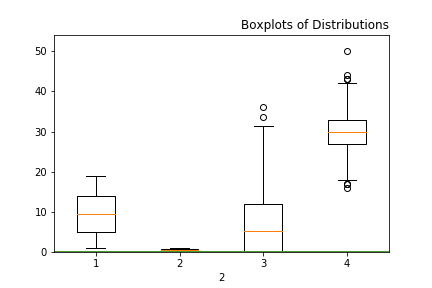

Text(1,1,'Boxplots of Distributions')

In [13]:
dists = [a, b, c, d]
plt.figure()
plt.boxplot(dists)
plt.title("Boxplots of Distributions", loc = "right")

<IPython.core.display.Javascript object>


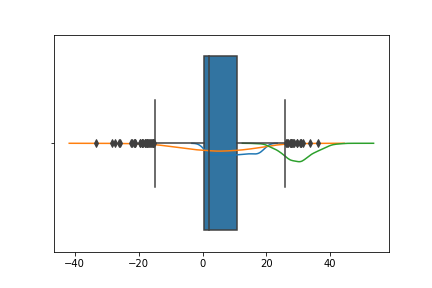

In [19]:
import seaborn as sns

df = pd.DataFrame([a, c, d])
 
plt.figure()
sns.distplot(a, hist=False)
sns.distplot(c, hist = False)
sns.distplot(d, hist = False)

<IPython.core.display.Javascript object>


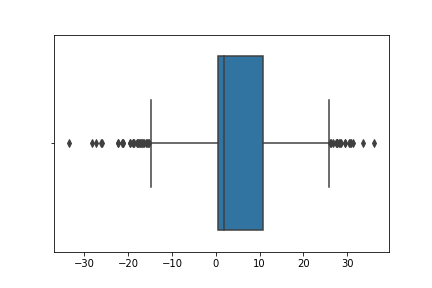

In [21]:
plt.figure()
sns.boxplot([a, b, c])

### Loading Data: Intro to Pandas

Now, we use the Pandas library to examine a variety of datasets.  Below, I create four different `DataFrame` objects from files.  The first three are from `.csv` files located in our **data** directory.  The final, is through the API from NYCOpenData.  We will continue to visit methods of accessing and structuring data, but to begin we use these two popular options.  

To load the `.csv` files, we provide Pandas with a path or url in the `.read_csv()` method.  I load all four datasets in what follows.

In [80]:
pd.read_json?

In [83]:
nyc311data = pd.read_json('https://data.cityofnewyork.us/resource/fhrw-4uyv.json' )

In [82]:
nyc311data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 35 columns):
address_type                      986 non-null object
agency                            1000 non-null object
agency_name                       1000 non-null object
bbl                               802 non-null float64
borough                           1000 non-null object
bridge_highway_segment            1 non-null object
city                              984 non-null object
closed_date                       319 non-null object
community_board                   1000 non-null object
complaint_type                    1000 non-null object
created_date                      1000 non-null object
cross_street_1                    762 non-null object
cross_street_2                    761 non-null object
descriptor                        1000 non-null object
due_date                          694 non-null object
facility_type                     999 non-null object
incident_address        

In [29]:
%%bash
ls | head -n 5

01-Practice-Examples.ipynb
02-EDA-Example.ipynb
03-groupby.ipynb
04-pandas_strings.ipynb
05-Aquastat-Introduction.ipynb


In [26]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install 

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("fhrw-4uyv", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [27]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 34 columns):
address_type                      1992 non-null object
agency                            2000 non-null object
agency_name                       2000 non-null object
bbl                               1548 non-null object
borough                           2000 non-null object
city                              2000 non-null object
closed_date                       1935 non-null object
community_board                   2000 non-null object
complaint_type                    2000 non-null object
created_date                      2000 non-null object
cross_street_1                    1257 non-null object
cross_street_2                    1253 non-null object
descriptor                        2000 non-null object
due_date                          929 non-null object
facility_type                     2000 non-null object
incident_address                  1689 non-null object
incident_zip  

In [32]:
nyc311data.columns

Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough',
       'bridge_highway_segment', 'city', 'closed_date', 'community_board',
       'complaint_type', 'created_date', 'cross_street_1', 'cross_street_2',
       'descriptor', 'due_date', 'facility_type', 'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'park_borough', 'park_facility_name',
       'resolution_action_updated_date', 'resolution_description', 'status',
       'street_name', 'taxi_pick_up_location', 'unique_key',
       'x_coordinate_state_plane', 'y_coordinate_state_plane'],
      dtype='object')

In [86]:
nyc311data.created_date = pd.to_datetime(nyc311data.created_date)

In [87]:
nyc311data.dtypes

address_type                              object
agency                                    object
agency_name                               object
bbl                                      float64
borough                                   object
bridge_highway_segment                    object
city                                      object
closed_date                               object
community_board                           object
complaint_type                            object
created_date                      datetime64[ns]
cross_street_1                            object
cross_street_2                            object
descriptor                                object
due_date                                  object
facility_type                             object
incident_address                          object
incident_zip                             float64
intersection_street_1                     object
intersection_street_2                     object
latitude            

In [34]:
nyc311data.describe()

,bbl,incident_zip,latitude,longitude,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
count,8.020000e+02,984.000000,969.000000,969.000000,1.000000e+03,9.690000e+02,969.000000
mean,2.774498e+09,10825.376016,40.730022,-73.923724,3.982060e+07,1.005379e+06,205263.249742
std,1.178140e+09,543.378163,0.087378,0.082332,2.871237e+03,2.283362e+04,31833.112272
min,1.000260e+09,10001.000000,40.503598,-74.244607,3.981562e+07,9.162330e+05,122841.000000
25%,2.028233e+09,10314.000000,40.669385,-73.968345,3.981822e+07,9.930300e+05,183206.000000
50%,3.019335e+09,11206.000000,40.723849,-73.925441,3.982055e+07,1.004930e+06,203013.000000
75%,4.013930e+09,11235.250000,40.813380,-73.874025,3.982318e+07,1.019158e+06,235617.000000
max,5.080460e+09,11694.000000,40.908174,-73.707509,3.982554e+07,1.065299e+06,270167.000000


In [35]:
complaints = nyc311data[['complaint_type', 'borough', 'agency', 'agency_name']]

In [36]:
complaints.head()

,complaint_type,borough,agency,agency_name
0,Request Large Bulky Item Collection,BROOKLYN,DSNY,Department of Sanitation
1,Blocked Driveway,BROOKLYN,NYPD,New York City Police Department
2,Noise - Street/Sidewalk,BRONX,NYPD,New York City Police Department
3,Illegal Parking,STATEN ISLAND,NYPD,New York City Police Department
4,Noise - Street/Sidewalk,MANHATTAN,NYPD,New York City Police Department


In [37]:
df_dropped = nyc311data.drop('longitude', axis = 1)

In [43]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 34 columns):
address_type                      986 non-null object
agency                            1000 non-null object
agency_name                       1000 non-null object
bbl                               802 non-null float64
borough                           1000 non-null object
bridge_highway_segment            1 non-null object
city                              984 non-null object
closed_date                       319 non-null object
community_board                   1000 non-null object
complaint_type                    1000 non-null object
created_date                      1000 non-null object
cross_street_1                    762 non-null object
cross_street_2                    761 non-null object
descriptor                        1000 non-null object
due_date                          694 non-null object
facility_type                     999 non-null object
incident_address        

In [44]:
complaints.groupby(by = 'borough').size()

borough
BRONX            188
BROOKLYN         322
MANHATTAN        207
QUEENS           232
STATEN ISLAND     45
Unspecified        6
dtype: int64

In [56]:
a = complaints.groupby(by = 'borough').size()

In [57]:
type(a)

pandas.core.series.Series

In [58]:
a.head()

borough
BRONX            188
BROOKLYN         322
MANHATTAN        207
QUEENS           232
STATEN ISLAND     45
dtype: int64

In [47]:
a.index

Index(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND',
       'Unspecified'],
      dtype='object', name='borough')

In [48]:
complaints.iloc[133]

complaint_type                Noise - Residential
borough                                     BRONX
agency                                       NYPD
agency_name       New York City Police Department
Name: 133, dtype: object

In [59]:
complaints[complaints['borough'] == 'BROOKLYN']['complaint_type'].value_counts().head()

Noise - Residential                    56
Illegal Parking                        37
Request Large Bulky Item Collection    34
Noise - Street/Sidewalk                30
Blocked Driveway                       21
Name: complaint_type, dtype: int64

In [60]:
BK_COMPLAIN = complaints[complaints['borough'] == 'BROOKLYN']['complaint_type'].value_counts()

<IPython.core.display.Javascript object>


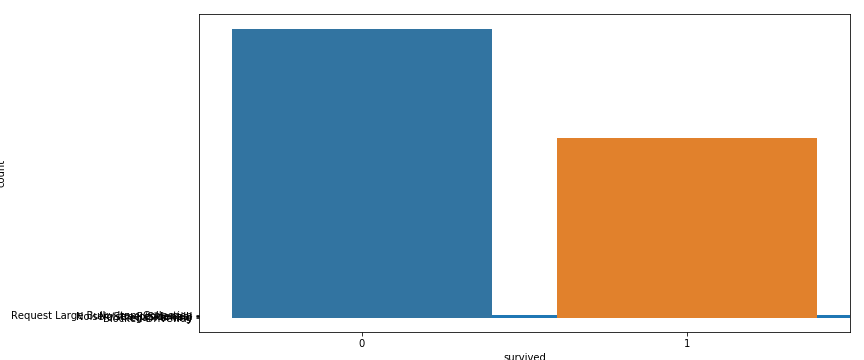

In [62]:
plt.figure(figsize = (12, 5))
plt.barh(BK_COMPLAIN[:5].index, BK_COMPLAIN[:5].values)
plt.tight_layout()

### Titanic Manipulation

In [65]:
nyc311data.agency.unique()

array(['DSNY', 'NYPD', 'DPR', 'DOT', 'TLC', 'DOHMH', 'DHS', 'DOE', 'HPD',
       'DEP', 'DFTA', 'DCA', 'HRA', 'DCAS'], dtype=object)

In [66]:
doe = nyc311data[nyc311data.agency == 'DOE']

In [70]:
list(doe.resolution_description)

['The Department of Education usually requires 7 days to respond to this type of complaint. Please note your service request number for future reference.']

In [88]:
nyc311data.groupby('agency')[['complaint_type']].count()

,complaint_type
agency,
DCA,3
DCAS,1
DEP,83
DFTA,2
DHS,11
DOE,1
DOHMH,32
DOT,72
DPR,73


In [78]:
pd.read_json?

In [89]:
titanic = pd.read_csv('data/eda_data/titanic.csv')
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
titanic[titanic.pclass == 3][:5]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [93]:
titanic.sample(frac=0.1)[:5]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
35,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
609,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S
178,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
703,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q
238,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,S


In [94]:
titanic.iloc[4:10]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [95]:
titanic.nlargest(10, 'age')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
280,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q


In [96]:
titanic.nsmallest(10, 'age')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
803,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
469,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
831,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
305,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
164,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S


In [97]:
gender = titanic[['survived', 'sex']]

In [98]:
gender[gender['survived'] == 0].groupby('sex').size()

sex
female     81
male      468
dtype: int64

In [100]:
gender[gender['survived'] == 1].groupby('sex').size()

sex
female    233
male      109
dtype: int64

<IPython.core.display.Javascript object>


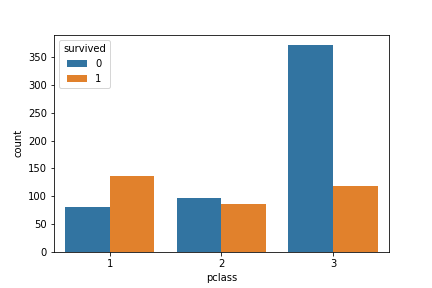

In [110]:
plt.figure()
sns.countplot(titanic.pclass, hue = titanic.survived)

<IPython.core.display.Javascript object>


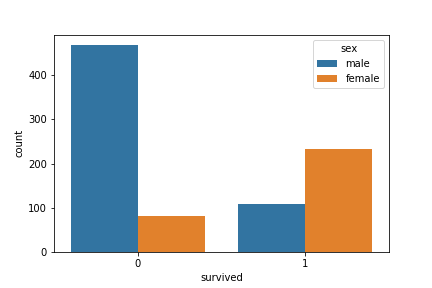

In [107]:
plt.figure()
sns.countplot(gender.survived, hue = gender.sex)

### Rock Songs

In [114]:
rockin = pd.read_csv('data/eda_data/rocking.csv', index_col = 0)

In [115]:
rockin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2229
Data columns (total 8 columns):
Song Clean      2230 non-null object
ARTIST CLEAN    2230 non-null object
Release Year    1653 non-null object
COMBINED        2230 non-null object
First?          2230 non-null int64
Year?           2230 non-null int64
PlayCount       2230 non-null int64
F*G             2230 non-null int64
dtypes: int64(4), object(4)
memory usage: 156.8+ KB


In [116]:
rockin.head()

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


In [117]:
rockin['First?'].value_counts()

1    2230
Name: First?, dtype: int64

In [133]:
titanic['age_group'] = pd.cut(titanic.age, 5, labels = ['low', 'notlow', 'medium', 'high', 'higher'])

In [134]:
titanic.age_group.head()

0    notlow
1    medium
2    notlow
3    medium
4    medium
Name: age_group, dtype: category
Categories (5, object): [low < notlow < medium < high < higher]

In [128]:
pd.cut?

In [ ]:
#rockin = rockin.rename({'First?': 'First', 'Year?': 'Year', 'F*G': 'fg'}, axis = 1)

In [ ]:
#null_release_mask = rockin['Release Year'].isnull()
#rockin.loc[null_release_mask, 'Release Year'] = 0

In [ ]:
#rockin.head()

In [ ]:
#rockin['ARTIST CLEAN'].unique()[::10]

### Problem

- What kinds of questions can you ask about the rock song data?
- Which of these questions are exploratory?
- Can you implement your ideas with Python and Pandas?

In [135]:
rockin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2229
Data columns (total 8 columns):
Song Clean      2230 non-null object
ARTIST CLEAN    2230 non-null object
Release Year    1653 non-null object
COMBINED        2230 non-null object
First?          2230 non-null int64
Year?           2230 non-null int64
PlayCount       2230 non-null int64
F*G             2230 non-null int64
dtypes: int64(4), object(4)
memory usage: 156.8+ KB


In [143]:
rockin[rockin['Release Year'] == '1982'].nlargest(5, 'PlayCount')

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
155,White Wedding,Billy Idol,1982,White Wedding by Billy Idol,1,1,84,84
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1557,No One Like You,Scorpions,1982,No One Like You by Scorpions,1,1,76,76
928,Jack & Diane,John Mellencamp,1982,Jack & Diane by John Mellencamp,1,1,73,73
2070,You Got Lucky,Tom Petty & The Heartbreakers,1982,You Got Lucky by Tom Petty & The Heartbreakers,1,1,71,71


In [147]:
rockin.groupby('Song Clean')['PlayCount'].sum().nlargest(10)

129.2

In [148]:
rockin.nlargest(n = 10, columns='PlayCount')

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
49,Dream On,Aerosmith,1973,Dream On by Aerosmith,1,1,142,142
65,Sweet Emotion,Aerosmith,1975,Sweet Emotion by Aerosmith,1,1,141,141
868,All Along the Watchtower,Jimi Hendrix,1968,All Along the Watchtower by Jimi Hendrix,1,1,141,141
38,You Shook Me All Night Long,AC/DC,1980,You Shook Me All Night Long by AC/DC,1,1,138,138
267,More Than a Feeling,Boston,1976,More Than a Feeling by Boston,1,1,134,134
968,Carry On Wayward Son,Kansas,1976,Carry On Wayward Son by Kansas,1,1,134,134
269,Peace of Mind,Boston,1976,Peace of Mind by Boston,1,1,132,132
774,Crazy On You,Heart,1976,Crazy On You by Heart,1,1,125,125
2220,Legs,ZZ Top,1983,Legs by ZZ Top,1,1,121,121
2224,Sharp Dressed Man,ZZ Top,1983,Sharp Dressed Man by ZZ Top,1,1,120,120


In [150]:
rockin.groupby(by = 'Release Year').size().nlargest(10)

Release Year
1973    104
1975     83
1977     83
1970     81
1971     75
1969     72
1980     70
1978     64
1979     63
1967     61
dtype: int64

In [ ]:
rockin.groupby('ARTIST CLEAN')['Song Clean'].count().sort_values(ascending = False)

In [ ]:
pcount = rockin[['ARTIST CLEAN', 'PlayCount']].groupby('ARTIST CLEAN').sum()

In [ ]:
pcount.nlargest(10, 'PlayCount')

In [ ]:
rockin.head()

In [ ]:
rockin = rockin.dropna()
rockin.info()

In [ ]:
eights = [str(i) for i in range(1980, 1990, 1)]

In [ ]:
eights

In [ ]:
rockin['Release Year'] = pd.to_numeric(rockin['Release Year'], errors = 'coerce')

In [ ]:
rockin.info()

In [ ]:
eighties = rockin[(rockin['Release Year'] >= 1980) & (rockin['Release Year'] < 1990) ]
eighties.head()

In [ ]:
eights = [str(i) for i in range(1980, 1990, 1)]
rockin[rockin['Release Year'].isin(eights)].head()

In [ ]:
eighties.sort_values('PlayCount', ascending = False).head()